In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import sys
import gc
import tensorflow as tf
from random import randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold, datasets
from IPython.display import clear_output


(480, 640, 3)


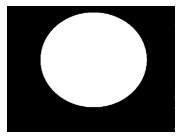

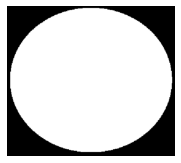

In [2]:
# read mask
%matplotlib inline
mask = np.array(cv2.imread('mask.png'))/255
mask[mask>0] = 1
print(mask.shape)
plt.figure(figsize=(3,3))
plt.imshow(mask,plt.cm.gray)
plt.axis("off");plt.show()

plt.figure(figsize=(3,3))
plt.imshow(mask[20:-85,120:-100],plt.cm.gray)
plt.axis("off");plt.show()

## check mask's white is 1
# temp = mask
# temp[temp==1] = 0
# plt.imshow(mask,plt.cm.gray)
# plt.axis("off");plt.show()

# read file for `white` picture

In [3]:
def read_white_file():
    print("reading data of white...")
    file_path='d:/Special_topic/pleurotus_eryngii/white/*'
    file_name = glob.glob(file_path)
    file_num = len(file_name)

    white_data = np.zeros((file_num,375,420,3),dtype=np.uint8)

    for i in range(file_num):
        white_data[i] = (cv2.imread(file_name[i]) * mask )[20:-85,120:-100]

    print("white_data.shape = ",white_data.shape)
    ## plot image for white data
    # plt.figure(figsize=(10,5))
    # for i in range(file_num):
    #     plt.subplot(3,3,i+1)
    #     plt.axis("off")
    #     plt.title(file_name[i])
    #     plt.imshow(cv2.cvtColor(data[i], cv2.COLOR_BGR2RGB))
    # plt.show()

    print("reading data of white sucessful\n")
    return white_data


white_data = read_white_file()


reading data of white...


white_data.shape =  (9, 375, 420, 3)
reading data of white sucessful



# read file for `data` picture

In [4]:
def read_data_file():
    print("reading data....")

    ## read file path
    ## file path 1030 1104 1108 1118 1122
    file_path='d:/Special_topic/pleurotus_eryngii/*'
    folder_name = glob.glob(file_path)[:5]
    file_name=[]
    for folder_name in folder_name:
        count = 0
        for fname in glob.glob(folder_name+"/*"):
            file_name.append(fname)
            count+=1
            if(count==9*1):
                pass
                # break
    print("file_name number: ",len(file_name))
    print("data all Group number: ",len(file_name)//9)

    data_Gnum = len(file_name)//9
    print("data_Gnum = ", data_Gnum)

    ## [data_Gnum][NumOfPicture][picture(480*640*wave)]
    data_black = np.zeros((data_Gnum,375,420,9),dtype=np.uint8)
    data       = np.zeros((data_Gnum,375,420,18),dtype=np.uint8)
    print("data_black.shpae = ",data_black.shape)
    print("data.shpae = ",data.shape)
    collected = gc.collect()
    print("Garbage collector: collected %d objects." % (collected))

    print("processing group")
    for group in range(data_Gnum):
        print("{}/{}".format(group+1,data_Gnum),end="\t")

        for black in range(3):
            img = cv2.imread(file_name[group*9+black]) * mask
            data_black[group][:,:,black*3:black*3+3] = img[20:-85,120:-100]

        for LED in range(6):
            img = cv2.imread(file_name[group*9+3+LED]) * mask
            data[group][:,:,LED*3:LED*3+3] = img[20:-85,120:-100]

    gc.collect()
    print("\nreading data sucessful\n")
    return data, data_black, data_Gnum

#=========================================================
data, data_black, data_Gnum = read_data_file()
print("data.type = ",type(data[0][0][0][0]))
print("data max = ", np.amax(data))
print("data max = ", np.amin(data))



reading data....
file_name number:  1296
data all Group number:  144
data_Gnum =  144
data_black.shpae =  (144, 375, 420, 9)
data.shpae =  (144, 375, 420, 18)
Garbage collector: collected 4372 objects.
processing group
1/144	

2/144	

3/144	4/144	

5/144	

6/144	7/144	

8/144	

9/144	10/144	11/144	

12/144	13/144	14/144	

15/144	16/144	17/144	

18/144	19/144	20/144	

21/144	22/144	23/144	24/144	

25/144	26/144	27/144	28/144	

29/144	30/144	31/144	

32/144	33/144	34/144	

35/144	36/144	37/144	

38/144	39/144	40/144	41/144	

42/144	43/144	44/144	

45/144	46/144	47/144	

48/144	49/144	50/144	

51/144	52/144	53/144	

54/144	55/144	56/144	

57/144	58/144	59/144	

60/144	61/144	62/144	

63/144	64/144	65/144	

66/144	67/144	68/144	

69/144	70/144	71/144	

72/144	73/144	74/144	

75/144	76/144	77/144	

78/144	79/144	80/144	

81/144	82/144	83/144	

84/144	85/144	86/144	

87/144	88/144	89/144	90/144	

91/144	92/144	93/144	

94/144	95/144	96/144	

97/144	98/144	99/144	

100/144	101/144	102/144	

103/144	104/144	105/144	

106/144	107/144	108/144	

109/144	110/144	111/144	

112/144	113/144	114/144	

115/144	116/144	117/144	

118/144	119/144	120/144	

121/144	122/144	123/144	

124/144	125/144	126/144	127/144	

128/144	129/144	130/144	

131/144	132/144	133/144	

134/144	135/144	136/144	

137/144	138/144	139/144	

140/144	141/144	142/144	

143/144	144/144	


reading data sucessful

data.type =  <class 'numpy.uint8'>


data max =  255


data max =  0


white_data.shape =  (9, 24, 24, 3)
data.shape =  (144, 24, 24, 18)
data_black.shape =  (144, 24, 24, 9)


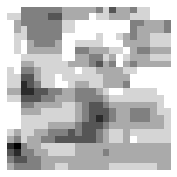

In [5]:
# Extract a small part of the data (8x8)
size = 25
size_d2 = size/2
size_d2 = int(size_d2)
white_data = white_data[:,188-size_d2:188+size_d2, 210-size_d2:210+size_d2]
data = data[:,188-size_d2:188+size_d2, 210-size_d2:210+size_d2]
data_black = data_black[:,188-size_d2:188+size_d2, 210-size_d2:210+size_d2]

print("white_data.shape = ",white_data.shape)
print("data.shape = ",data.shape)
print("data_black.shape = ",data_black.shape)

plt.figure(figsize=(3,3))
plt.imshow(data[0][:, :, 0],plt.cm.gray)
plt.axis("off");plt.show()

In [6]:
# solve div0 question

def div0(a,b):
    b[b==0] = -1
    c = a/b
    c[c<0] = 0
    return c

def print_info(img):
    print("max =",np.amax(img))
    print("min =",np.amin(img))
    print("mean=",np.mean(img))

a = np.array([1.,0.,0.], dtype='float')
b = np.array([0.,1.,0.], dtype='float')
c = div0(a,b)
print(div0(a,b))

[ 0.  0. -0.]


# calculate reflectivity

In [7]:
## initialization
# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
data = data.astype('float')
white_data = white_data.astype('float')
reflectivity = np.zeros_like(data, dtype='float')
print("reflectivity.shape=", reflectivity.shape)
print()

dark_30 = white_data[2]
dark_40 = white_data[0]
dark_100= white_data[1]
# print("dark_100.shape=",dark_100.shape)

LED1_white = white_data[3]
LED2_white = white_data[4]
LED3_white = white_data[5]
LED4_white = white_data[5]
LED5_white = white_data[7]
LED6_white = white_data[8]
# print("LED6_white.shape=",LED6_whdef array_divide(a,b):

print(type(dark_30[0][0][0]))


reflectivity.shape= (144, 24, 24, 18)

<class 'numpy.float64'>


In [8]:
# deal reflectivity
for Gnum in range(data_Gnum):
    shape = white_data.shape
    LED = np.zeros(white_data.shape,dtype=np.float)
    LED = LED[:6]
    for i in range(6):
        LED[i] = data[Gnum][:,:,i*3:i*3+3]

    reflectivity[Gnum][:,:,0:3]   = div0((LED[0]-dark_40) , (LED1_white-dark_40))
    reflectivity[Gnum][:,:,3:6]   = div0((LED[1]-dark_30) , (LED2_white-dark_30))
    reflectivity[Gnum][:,:,6:9]   = div0((LED[2]-dark_30) , (LED3_white-dark_30))
    reflectivity[Gnum][:,:,9:12]  = div0((LED[3]-dark_30) , (LED4_white-dark_30))
    reflectivity[Gnum][:,:,12:15] = div0((LED[4]-dark_30) , (LED5_white-dark_30))
    reflectivity[Gnum][:,:,15:]   = div0((LED[5]-dark_100), (LED6_white-dark_100))
    gc.collect()

    print("{}/{}\t".format(Gnum, data_Gnum),end="")

reflectivity[reflectivity<0] = 0
reflectivity[reflectivity>1] = 1
print("\nprocess sucessful\n")


0/144	

1/144	2/144	

3/144	

4/144	5/144	

6/144	

7/144	8/144	

9/144	10/144	11/144	

12/144	13/144	14/144	

15/144	16/144	17/144	

18/144	19/144	20/144	

21/144	22/144	23/144	24/144	

25/144	26/144	27/144	28/144	

29/144	30/144	31/144	32/144	

33/144	34/144	35/144	

36/144	37/144	38/144	39/144	

40/144	41/144	42/144	43/144	

44/144	45/144	46/144	47/144	

48/144	49/144	50/144	

51/144	52/144	53/144	54/144	

55/144	56/144	57/144	58/144	

59/144	60/144	61/144	62/144	

63/144	64/144	

65/144	66/144	67/144	

68/144	69/144	70/144	71/144	

72/144	73/144	74/144	

75/144	76/144	77/144	

78/144	79/144	80/144	

81/144	82/144	83/144	

84/144	85/144	86/144	

87/144	88/144	89/144	

90/144	91/144	92/144	

93/144	

94/144	95/144	96/144	

97/144	98/144	99/144	

100/144	101/144	102/144	

103/144	104/144	105/144	

106/144	107/144	108/144	

109/144	110/144	111/144	

112/144	113/144	114/144	115/144	

116/144	117/144	118/144	119/144	

120/144	121/144	122/144	

123/144	124/144	125/144	

126/144	127/144	128/144	

129/144	130/144	131/144	

132/144	133/144	134/144	

135/144	136/144	137/144	

138/144	139/144	140/144	

141/144	142/144	143/144	
process sucessful



In [9]:
del LED
del white_data, LED1_white, LED2_white, LED3_white, LED4_white, LED5_white, LED6_white
del dark_100, dark_30, dark_40
del data, data_black
%whos

Variable          Type        Data/Info
---------------------------------------
Gnum              int         143
PCA               ABCMeta     <class 'sklearn.decomposition._pca.PCA'>
StandardScaler    type        <class 'sklearn.preproces<...>ng._data.StandardScaler'>
a                 ndarray     3: 3 elems, type `float64`, 24 bytes
animation         module      <module 'matplotlib.anima<...>atplotlib\\animation.py'>
b                 ndarray     3: 3 elems, type `float64`, 24 bytes
c                 ndarray     3: 3 elems, type `float64`, 24 bytes
clear_output      function    <function clear_output at 0x000001DE37578948>
cv2               module      <module 'cv2.cv2' from 'C<...>\cv2.cp37-win_amd64.pyd'>
data_Gnum         int         144
datasets          module      <module 'sklearn.datasets<...>\\datasets\\__init__.py'>
div0              function    <function div0 at 0x000001DE45176948>
gc                module      <module 'gc' (built-in)>
glob              module      <module

 group 0 ==================================


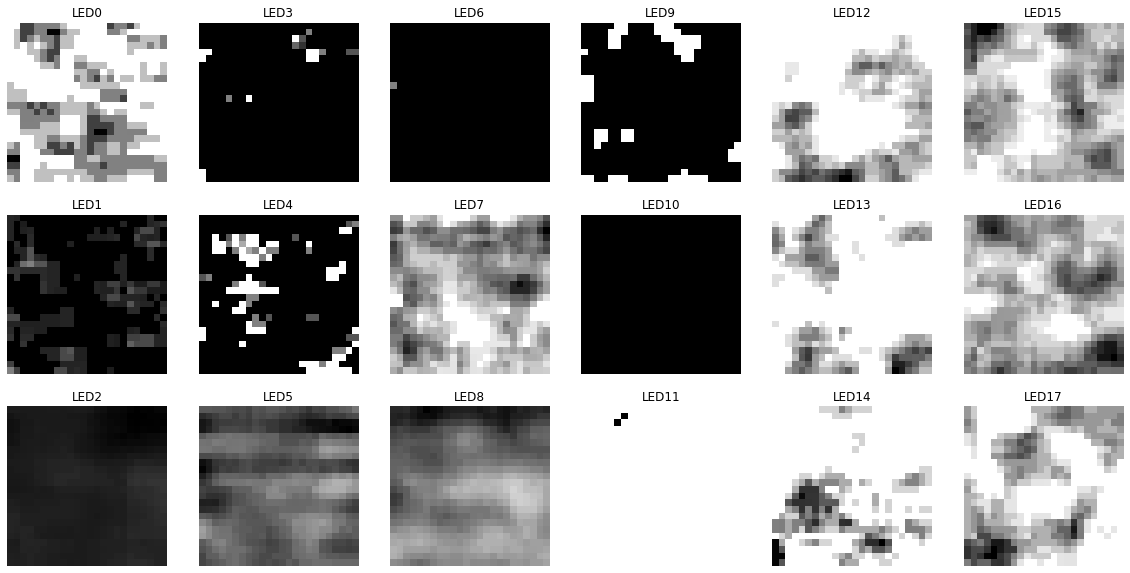

In [10]:
def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    print(" group {} ==================================".format(Gnum))

    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))

            # plt.imshow(data[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            plt.imshow(reflectivity[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()
    break


# del data witch we don't want

 group 0 ==================================


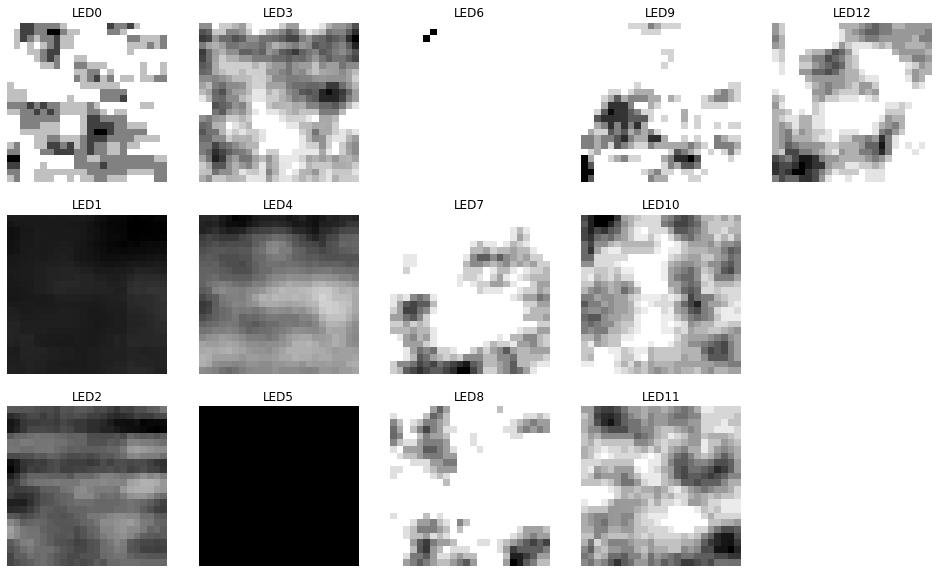

In [11]:
reflectivity_process = reflectivity
del reflectivity
reflectivity_process = np.delete(reflectivity_process,9,3)
reflectivity_process = np.delete(reflectivity_process,6,3)
reflectivity_process = np.delete(reflectivity_process,4,3)
reflectivity_process = np.delete(reflectivity_process,3,3)
reflectivity_process = np.delete(reflectivity_process,1,3)

def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    if(Gnum==1):
        break

    print(" group {} ==================================".format(Gnum))
    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            if(figure_index==13):
                break
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))
            plt.imshow(reflectivity_process[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()


# let data to be a spectral curve

In [12]:
print(reflectivity_process.shape)
curve = reflectivity_process
print(curve.shape)
curve = curve.transpose(0,3,1,2)
print(curve.shape)
(group,band,x,y) = curve.shape
curve = curve.reshape(group,band,x*y)
curve = curve.transpose(1,0,2)
print(curve.shape)
(band,group,xy) = curve.shape
curve = curve.reshape(band,group*xy)
print(curve.shape)
curve = curve.transpose(1,0)
print(curve.shape)


(144, 24, 24, 13)
(144, 24, 24, 13)
(144, 13, 24, 24)
(13, 144, 576)
(13, 82944)
(82944, 13)


In [13]:
# z-scroce
print("total is {}".format(curve.shape[0]))
for data_n in range(curve.shape[0]):
    m = np.mean(curve[data_n])
    std = np.std(curve[data_n])
    curve[data_n] = (curve[data_n]-m)/std
    if data_n%1000 is 0:
        print(data_n, end=' ')
print("\nsucessful")

total is 82944
0 1000 2000 3000 4000 5000 6000 

7000 

8000 9000 10000 11000 12000 13000 14000

 15000 16000 17000 18000 19000 20000 21000

 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000

 35000 36000 37000 38000 39000 40000 41000 42000 43000 

44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000

 58000 59000 60000 61000 62000 63000 64000 65000

 66000 67000 68000 69000 70000 71000 72000 73000 74000

 75000 76000 77000 78000 79000 80000 81000 82000 
sucessful


In [14]:
%matplotlib qt
data_n = curve.shape[0]
print(data_n)
# colormap = plt.cm.rainbow(np.linspace(0, 1, data_n))
# plt.ion()
# plt.figure(figsize = (15,7))
# plt.subplot(1,2,2)
# for data_G in range(data_n):
#     plt.plot(np.linspace(1,13,13),curve[data_G],color=colormap[data_G])

# plt.subplot(1,2,1)
# for data_G in range(data_Gnum):
#     plt.plot(np.linspace(1,13,13),curve[data_G],color=colormap[data_G])
#     plt.pause(0.001)

# plt.show()

82944


# t-SNE

In [36]:
n_components = 2
perplexity = 20
early_exaggeration = 15
learning_rate = 10
n_iter = 1000
n_iter_without_progress = 300
min_grad_norm = 1e-07
metric = 'euclidean'
init = 'pca'
verbose = 1
random_state = None
method = 'barnes_hut'
angle = 0.5
n_jobs = None

range_ = 1
start = 400
# data_norm_n = np.zeros((range_,data_n,2))
# print(data_norm_n.shape)

# print("Process...")
# for perplexity in range(start,start+range_):
#     print("{}/{}".format(perplexity-start+1,range_),end='\t')
#     tsne = manifold.TSNE(n_components=n_components, perplexity=perplexity, early_exaggeration=early_exaggeration,\
#                         learning_rate=learning_rate, n_iter=n_iter, n_iter_without_progress=n_iter_without_progress,\
#                         min_grad_norm=min_grad_norm, metric=metric, init=init, verbose=False,\
#                         random_state=random_state, method=method, angle= angle, n_jobs=n_jobs)
#     tSNE_data = tsne.fit_transform(curve[:data_n])
#     file_name = "t-SNE_144_n{}_per{}_lr{}_iter{}".format(n_components,perplexity,learning_rate,n_iter)

#     # print("\nOrg data dimension is {}\n\
#     # Embedded data dimension is {}".format(reflectivity_p_s.shape, tSNE_data.shape))

#     data_min, data_max = tSNE_data.min(0), tSNE_data.max(0)
#     data_norm = (tSNE_data - data_min) / (data_max - data_min)  # 归一化
#     # print(data_norm.shape)
#     data_norm_n[perplexity-start] = data_norm
# print("\nProcess sucessful")

tsne = manifold.TSNE(n_components=n_components, perplexity=perplexity, early_exaggeration=early_exaggeration,\
                    learning_rate=learning_rate, n_iter=n_iter, n_iter_without_progress=n_iter_without_progress,\
                    min_grad_norm=min_grad_norm, metric=metric, init=init, verbose=False,\
                    random_state=random_state, method=method, angle= angle, n_jobs=n_jobs)
tSNE_data = tsne.fit_transform(curve)
file_name = "t-SNE_144_n{}_per{}_lr{}_iter{}".format(n_components,perplexity,learning_rate,n_iter)

# print("\nOrg data dimension is {}\n\
# Embedded data dimension is {}".format(reflectivity_p_s.shape, tSNE_data.shape))

data_min, data_max = tSNE_data.min(0), tSNE_data.max(0)
data_norm = (tSNE_data - data_min) / (data_max - data_min)
# print(data_norm.shape)
print("\nProcess sucessful")


Process sucessful


colormap = plt.cm.rainbow(np.linspace(0, 1, data_Gnum))
plt.ion()
for num in range(range_):
    for i in range(data_n):
        plt.text(data_norm_n[num,i, 0], data_norm_n[num,i, 1], str(i), color=colormap[i],
                fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]); plt.yticks([]); plt.title('perplexity = {} range={}~{}'.format(start+num,start,start+range_))
    plt.pause(1)
    plt.clf()



In [37]:
%matplotlib qt

In [38]:
# 2d with text
%matplotlib qt
colormap = plt.cm.rainbow(np.linspace(0, 1, data_norm.shape[0]))
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
for i in range(data_norm.shape[0]//2):
# for i in range(5):
    plt.text(data_norm[i, 0], data_norm[i, 1], str(i), color=colormap[i],
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([]); plt.yticks([]);
# plt.savefig('d:/Special_topic/program/t-SNE_result/{}.png'.format(file_name))
# plt.show()

In [39]:
# 2d with text
# %matplotlib qt
# colormap = plt.cm.rainbow(np.linspace(0, 1, data_norm.shape[0]))
# plt.figure(figsize = (10,10))
plt.subplot(1,2,2)
for i in range(44172 ,data_norm.shape[0]):
    plt.text(data_norm[i, 0], data_norm[i, 1], str(i), color=colormap[i],
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([]); plt.yticks([]);
# plt.savefig('d:/Special_topic/program/t-SNE_result/{}.png'.format(file_name))
plt.show()


# 3D
%matplotlib qt
colormap = plt.cm.rainbow(np.linspace(0, 1, data_norm.shape[0]))
plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='3d')
for i in range(data_norm.shape[0]):
    ax.text(data_norm[i,0], data_norm[i,1], data_norm[i,2],str(i), color=colormap[i])
    # ax.scatter(data_norm[i,0], data_norm[i,1], data_norm[i,2],str(i), cmap=colormap[i])

plt.savefig('d:/Special_topic/program/t-SNE_result/{}.png'.format(file_name))
plt.show()
